In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, FunctionTransformer, label_binarize, StandardScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [17]:
df = pd.read_csv("GRIR_GCP_Data.csv", sep=",")

In [18]:
df.head(10)

,WERKS,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,EKGRP,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
0,ML01,3,1,1,30,1,A,0,80,0,90,-80,-38100,1
1,ML01,3,1,1,30,1,A,0,107,0,177,-107,-41600,0
2,ML01,3,1,1,30,1,A,0,107,0,152,-107,-27600,1
3,ML01,3,1,1,30,1,A,0,96,0,79,-96,-13800,1
4,ML01,3,1,1,30,1,A,0,146,0,192,-146,-73500,0
5,ML01,3,1,1,60,1,A,0,189,0,139,-189,-26600,1
6,ML01,3,1,1,60,1,A,0,183,0,48,-183,-69200,0
7,ML01,3,1,1,60,1,A,0,159,0,195,-159,-73600,0
8,ML01,3,1,1,60,1,A,0,185,0,79,-185,-59500,0
9,ML01,3,1,1,60,1,A,0,91,0,168,-91,-4700,1


In [19]:
df.describe()

,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
count,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0,8279.0
mean,2.6,1.5,1.1,60.3,1.3,65.9,94.1,103.1,89.5,-28.2,-6716.3,0.4
std,1.1,0.5,0.3,24.4,0.5,63.0,62.4,82.0,75.0,63.2,22797.4,0.5
min,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,-200.0,-75000.0,0.0
25%,2.0,1.0,1.0,30.0,1.0,0.0,54.0,0.0,10.0,-56.0,-9600.0,0.0
50%,3.0,1.0,1.0,60.0,1.0,55.0,99.0,112.0,82.0,-2.0,-546.0,0.0
75%,4.0,2.0,1.0,90.0,2.0,121.0,146.0,172.0,154.0,11.0,5482.0,1.0
max,4.0,2.0,2.0,90.0,2.0,200.0,200.0,268.0,242.0,74.0,59200.0,1.0


In [20]:
df.columns

Index(['WERKS', 'SCENARIO', 'KTOKK', 'VSTATU', 'VPATD', 'EKORG', 'EKGRP',
       'TOTGRQTY', 'TOTIRQTY', 'NODLGR', 'NODLIR', 'DIFGRIRD', 'DIFGRIRV',
       'STATUS'],
      dtype='object')

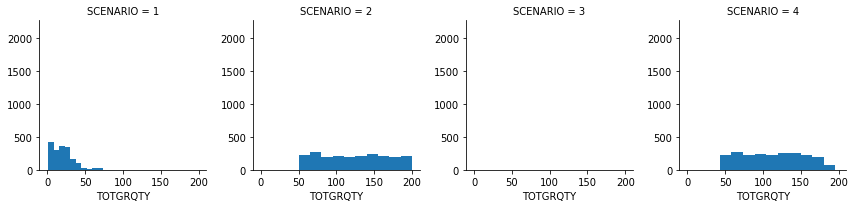

In [21]:
#Facet1
g = sns.FacetGrid(df, col="SCENARIO")
g = g.map(plt.hist, "TOTGRQTY")
plt.show()

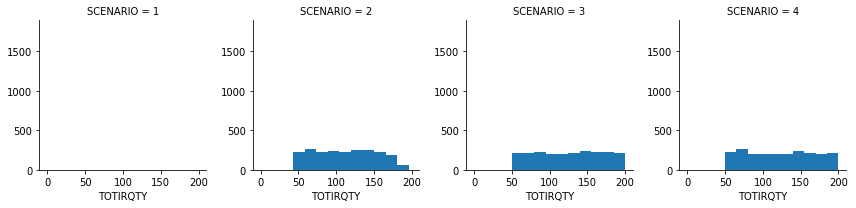

In [22]:
#Facet1
g = sns.FacetGrid(df, col="SCENARIO")
g = g.map(plt.hist, "TOTIRQTY")
plt.show()

In [23]:
#Filter out scenario = 3 ( It has TOTGRQTY == 0 )
df_s1 = df[df['SCENARIO'].eq(3) & df['TOTGRQTY'].eq(0)]
df_s1

,WERKS,SCENARIO,KTOKK,VSTATU,VPATD,EKORG,EKGRP,TOTGRQTY,TOTIRQTY,NODLGR,NODLIR,DIFGRIRD,DIFGRIRV,STATUS
0,ML01,3,1,1,30,1,A,0,80,0,90,-80,-38100,1
1,ML01,3,1,1,30,1,A,0,107,0,177,-107,-41600,0
2,ML01,3,1,1,30,1,A,0,107,0,152,-107,-27600,1
3,ML01,3,1,1,30,1,A,0,96,0,79,-96,-13800,1
4,ML01,3,1,1,30,1,A,0,146,0,192,-146,-73500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,ML03,3,2,1,90,2,C,0,115,0,59,-115,-55300,0
2156,ML03,3,2,1,90,2,C,0,120,0,60,-120,-63500,0
2157,ML03,3,2,1,90,2,C,0,157,0,186,-157,-45000,0
2158,ML03,3,2,1,90,2,C,0,97,0,121,-97,-62300,0


In [24]:
#Mark some columns as categorical so that TF treats them as categorical
for col_cat in ['SCENARIO','KTOKK','VSTATU','EKORG']:
    df[col_cat] = df[col_cat].astype('str') #Very important to keep this as STR -> Tensorflow treats only STR as categorical
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 14 columns):
WERKS       8279 non-null object
SCENARIO    8279 non-null object
KTOKK       8279 non-null object
VSTATU      8279 non-null object
VPATD       8279 non-null int64
EKORG       8279 non-null object
EKGRP       8279 non-null object
TOTGRQTY    8279 non-null int64
TOTIRQTY    8279 non-null int64
NODLGR      8279 non-null int64
NODLIR      8279 non-null int64
DIFGRIRD    8279 non-null int64
DIFGRIRV    8279 non-null int64
STATUS      8279 non-null int64
dtypes: int64(8), object(6)
memory usage: 905.6+ KB


In [25]:
######################################## SKLearn Pipeline building and Modeling ############################################

In [27]:
#Prepare train and output columns
df_x = df.drop(['STATUS'],axis=1)
df_y = df['STATUS']

In [33]:
#Split dataset -> Split 10 times and choose the one with best P values( Significance test )
p_res = {}
t_res = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=i,stratify=df_y)

    #Run Significance Tests on both the distributions( Train and Test ) for all numerical attributes
    p_res = {}
    for c_ in X_train.columns:
        if not X_train[c_].dtype == 'object':
            try:
                _, a = scipy.stats.ks_2samp(X_train[c_].values,X_test[c_].values)
                #print('P-value for column {} is {}'.format(c_.upper(), a))
                p_res['Random'] = i
                p_res[c_] = a
            except:
                p_res['Random'] = i
                p_res[c_] = 'Error'
    t_res.append(p_res)

p_df = pd.DataFrame(t_res)
p_df

,DIFGRIRD,DIFGRIRV,NODLGR,NODLIR,Random,TOTGRQTY,TOTIRQTY,VPATD
0,0.9,0.9,1.0,0.5,0,0.2,0.3,1.0
1,1.0,0.8,0.8,0.7,1,0.6,0.1,1.0
2,0.6,0.2,0.1,0.2,2,0.3,0.8,0.7
3,0.3,0.4,0.0,0.2,3,0.0,0.9,1.0
4,0.1,0.1,0.5,0.2,4,0.5,0.2,1.0
5,0.6,0.5,0.8,0.5,5,0.8,0.6,1.0
6,0.3,0.2,1.0,0.9,6,0.7,0.4,0.9
7,0.9,0.9,0.8,1.0,7,0.6,0.3,0.7
8,0.5,0.7,0.9,0.2,8,0.8,0.9,0.7
9,0.5,1.0,0.5,0.4,9,0.9,0.7,1.0


In [34]:
#Use the best split value from above after manual inspection
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=8,stratify=df_y)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 692 to 315
Data columns (total 13 columns):
WERKS       7451 non-null object
SCENARIO    7451 non-null object
KTOKK       7451 non-null object
VSTATU      7451 non-null object
VPATD       7451 non-null int64
EKORG       7451 non-null object
EKGRP       7451 non-null object
TOTGRQTY    7451 non-null int64
TOTIRQTY    7451 non-null int64
NODLGR      7451 non-null int64
NODLIR      7451 non-null int64
DIFGRIRD    7451 non-null int64
DIFGRIRV    7451 non-null int64
dtypes: int64(7), object(6)
memory usage: 815.0+ KB


In [41]:
##https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines
#Create transformation and model pipeline

#Create Pipeline function to oneHot a Categorical column
# class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
#     def __init__(self, sparse_output=False):
#         self.sparse_output = sparse_output
        
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X, y=None):
#         enc = LabelBinarizer(sparse_output=self.sparse_output)
#         return enc.fit_transform(X)

#Transformer functions
def select_col_df(df, cols, iscatego):
    if iscatego == True:
        return df[cols]
    else:
        return df[[cols]]

def calc_grminusirbyvpatd(df):
    df['grminusirbyvpatd'] = ( df['TOTGRQTY'] - df['TOTIRQTY'] ) / df['VPATD']
    return(df[['grminusirbyvpatd']])

#1. Hash convert categorical columns
col_pipe = {}
for c_ in X_train.columns:
    if X_train[c_].dtype == 'object':
#         col_pipe[c_] = Pipeline([
#                                 ('column_selector', CatColSelector(key=c_)),
#                                 ('column_oh', CustomLabelBinarizer())
#                             ])
        
        col_pipe[c_] = Pipeline([
                                    ('col_sel', FunctionTransformer(select_col_df,kw_args={'cols': c_, 'iscatego': True},
                                                                    validate=False)),
                                    ('col_hash', FeatureHasher(n_features=10,input_type='string'))
                                ])
        
#2. Also add numerical columns into pipeline
for c_ in X_train.columns:
    if not X_train[c_].dtype == 'object':
        col_pipe[c_] = Pipeline([
                                ('col_sel', FunctionTransformer(select_col_df,kw_args={'cols': c_, 'iscatego': False},
                                                                validate=False)),
                                ('std_scaler', StandardScaler())
                            ])

#3. Create a few new columns: "new_ratio_loan_salary"
col_pipe['grminusirbyvpatd'] = Pipeline([
                                                ('col_new_ratio',FunctionTransformer(calc_grminusirbyvpatd, validate=False)),
                                                ('std_scaler', StandardScaler())
                                            ])

#4. Combine all features in col_pipe{} with FeatureUnion
feats = FeatureUnion([
                        (col_, col_pipe[col_]) for col_ in list(col_pipe.keys())
                    ])

#5. Add ML algorithm in Pipeline
final_pipeline = Pipeline([
                        ('features',feats),
                        ('classifier', RandomForestClassifier(random_state = 42,n_estimators = 1000,
                                                              oob_score=True,n_jobs=-1,verbose=1)),
                         ])

#6. Train ML model
print("Training ML model")
final_pipeline.fit(X_train, y_train)
#a = test_x.fit_transform(X_train)
#col_pipe['new_ratio_loan_salary'].fit_transform(X_train)
#col_pipe['dti'].fit_transform(X_train)
#col_pipe['grade'].fit_transform(X_train)

Training ML model


c:\users\hrafiq\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.8s finished


Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('VPATD', Pipeline(memory=None,
     steps=[('col_sel', FunctionTransformer(accept_sparse=False,
          func=<function select_col_df at 0x000001BF42CF8AE8>,
          inv_kw_args=None, inverse_func=None,
          kw_args={'iscat...imators=1000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=1, warm_start=False))])

In [42]:
#Predict on Train set again
print("Train accuracy:", final_pipeline.score(X_train,y_train))
#rf.predict(test_set.values[:,1:])
print("Test accuracy:", final_pipeline.score(X_test,y_test))

c:\users\hrafiq\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.7s finished


Train accuracy: 1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s


Test accuracy: 0.9685990338164251


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
